# Modeling exercise

## General Instructions

* Submission date: 25.4.2022
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1fTmjiVxzw_rM1hdh16enwUTtxzlHSJIiw41dJS2LKp0/edit?usp=sharing).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('../Modles and Modeling/src')
import numpy as np
import plotly_express as px

In [3]:
import pandas as pd
import ipywidgets as widgets

In [4]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the validation set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. What is the best model and model params? How stable is it? באחד מהמודלים 
1. What is the most stable model and model params? How good is it? 
1. Does regularization help for linear models? 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? כאן צריך לבדוק על מודל svm  
1. Are the noise level effect the number of datapoints needed to reach minimal test results? 
1. Select the best model param to fit the data (The one minimizing the test error) and for it, observe the number of data points needed for optimal test results in different noise levels.

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [5]:
from sklearn.datasets import make_moons

In [6]:
moons_df = pd.DataFrame(columns = ['x','y','label','DS_NAME','NL'])
for nl in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:
    df = make_moons_dataframe(n_samples=10000, noise_level= nl)
    df['DS_NAME'] = 'moons'
    df['NL'] = nl
    moons_df = moons_df.append(df)
moons_df.reset_index()
moons_df.head()

,x,y,label,DS_NAME,NL
0,-0.870752,0.491723,A,moons,0
1,1.878369,0.022018,B,moons,0
2,1.927416,0.125970,B,moons,0
3,0.730584,0.682823,A,moons,0
4,-0.617717,0.786400,A,moons,0


In [7]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [8]:
circles_df = pd.DataFrame(columns = ['x','y','label','DS_NAME','NL'])
for nl in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:
    df = make_circles_dataframe(n_samples=10000, noise_level=nl)
    df['DS_NAME'] = 'circles'
    df['NL'] = nl
    circles_df = circles_df.append(df)
circles_df.reset_index()
circles_df.head()

,x,y,label,DS_NAME,NL
0,0.789834,-0.127133,B,circles,0
1,0.848344,-0.529446,A,circles,0
2,-0.648393,0.468600,B,circles,0
3,0.753045,0.270044,B,circles,0
4,0.198952,0.774867,B,circles,0


In [9]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [10]:
#one big dataframe
union_df = circles_df.append(moons_df)

In [11]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:
union_df = circles_df.append(moons_df)
union_df.reset_index()
union_df.groupby(['DS_NAME','NL']).size()

DS_NAME  NL 
circles  0.0    10000
         0.1    10000
         0.2    10000
         0.3    10000
         0.4    10000
         0.5    10000
moons    0.0    10000
         0.1    10000
         0.2    10000
         0.3    10000
         0.4    10000
         0.5    10000
dtype: int64

In [25]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold , cross_val_score, train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#import sklearn.svm as svm
from sklearn.metrics import accuracy_score

datasets_type = ['circles', 'moons']
k_folds = 5
n_samples = [10, 50, 100, 1000, 10000]#
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]#
clf_types = ['log_reg', 'knn','svm']#, 'random_forest'
svm_kernel = 'poly'
C_range = [1e-3,1e-2, 1e-1, 1, 1e1, 1e2, 1e3]# 
#gamma_range = [1e-2, 1e-1, 1, 1e1, 1e2]
k_neighbours = [1,2,3,4,5,6,7,8,9,10]
regularization_values = 'l2'
models_results = []

#loop over datasets
for d in datasets_type:
    ds_type = union_df.query('DS_NAME == @d')
#    print(f'Working on {ds_type.DS_NAME.unique()}')
    
    #loop over nois levels
    for nl in noise_levels:
        ds_nl = ds_type.query('NL == @nl')
        
        #loop over dataset sizes
        for n in n_samples:
            ds = ds_nl.sample(n, random_state=42)
            y = ds['label']
            X = ds[['x', 'y']]
            #X_train,X_test,y_train,y_test= train_test_split(X,y,train_size = 0.8, random_state=42)
            y_train = y
            X_train = X
            
            #loop over model
            for clf_type in clf_types:
#                print(f'Starting {k_folds}-fold cross validation for {ds_type.DS_NAME.unique()} dataset with {n} samples and noise level {nl}. Going to train {clf_type} classifiers.')
                
                # apply logistic regression
                if clf_type == 'log_reg':
                    kf=KFold(n_splits=k_folds)
                    for c in C_range:
                        logreg=LogisticRegression(max_iter = 10000, penalty= regularization_values, C= c, class_weight='balanced', random_state=42)
                        logreg_score= cross_validate(logreg, X_train, y_train, cv=kf, return_train_score= True, return_estimator= True, scoring='accuracy')
                        models_results.append({
                                                'DS_NAME': d
                                               ,'N': X_train.shape[0] 
                                               ,'NL': nl
                                               ,'CLF_NAME': clf_type
                                               ,'K_FOLDS': k_folds
                                               ,'TRE': logreg_score['train_score'].mean()
                                               ,'TRE_std': logreg_score['train_score'].std()
                                               ,'TESTE': logreg_score['test_score'].mean()
                                               ,'TESTE_std': logreg_score['test_score'].std()
                                               ,'E_DIFF': logreg_score['train_score'].mean()-logreg_score['test_score'].mean()
                                               ,'REGULARIZATION': regularization_values
                                               ,'HYPER_PARAMETER_NAME': 'gamma (1/C)'
                                               ,'HYPER_PARAMETER': 1/c
                                              })
                        

                # apply KNN model
                if clf_type == 'knn':
                    kf=KFold(n_splits=k_folds)
                    for k in k_neighbours:
                        if k > int(X_train.shape[0]*0.8):continue
                        knn = KNeighborsClassifier(n_neighbors=k)
                        knn_score= cross_validate(knn, X_train, y_train, cv=kf, return_train_score= True, scoring='accuracy')           
                        models_results.append({
                                                'DS_NAME': d
                                               ,'N': X_train.shape[0] 
                                               ,'NL': nl
                                               ,'CLF_NAME': clf_type
                                               ,'K_FOLDS': k_folds
                                               ,'TRE': knn_score['train_score'].mean()
                                               ,'TRE_std': knn_score['train_score'].std()
                                               ,'TESTE': knn_score['test_score'].mean()
                                               ,'TESTE_std': knn_score['test_score'].std()
                                               ,'E_DIFF': knn_score['train_score'].mean()-knn_score['test_score'].mean()
                                               ,'REGULARIZATION': None
                                               ,'HYPER_PARAMETER_NAME': 'k'
                                               ,'HYPER_PARAMETER': k
                                              })

#                if clf_type == 'svm':
#                    kf=KFold(n_splits=k_folds)
#                    for g in gamma_range:
#                        svm_clf= svm.SVC(kernel= svm_kernel, gamma= g) #, class_weight= 'balanced', random_state=42
#                        svm_score= cross_validate(svm_clf, X_train, y_train, cv=kf, return_train_score= True, return_estimator= True, scoring='accuracy')
#                        models_results.append({
#                                                'DS_NAME': d
#                                               ,'N': X_train.shape[0] 
#                                               ,'NL': nl
#                                               ,'CLF_NAME': clf_type
#                                               ,'K_FOLDS': k_folds
#                                               ,'TRE': svm_score['train_score'].mean()
#                                               ,'TRE_std': svm_score['train_score'].std()
#                                               ,'TESTE': svm_score['test_score'].mean()
#                                               ,'TESTE_std': svm_score['test_score'].std()
#                                               ,'E_DIFF': svm_score['train_score'].mean()-svm_score['test_score'].mean()
#                                               ,'REGULARIZATION': None
#                                               ,'HYPER_PARAMETER_NAME': 'gamma'
#                                               ,'HYPER_PARAMETER': g
#                                              })                       
#                        
                        
results = pd.DataFrame(models_results)
                  

px.line(results.query('DS_NAME=="circles" and CLF_NAME=="log_reg" and N==10000'), x='NL', y=['TESTE','TRE'] ,color = 'HYPER_PARAMETER')

In [26]:
results.shape

(996, 13)

In [274]:
# look at portion of data
results.query('DS_NAME=="moons" and CLF_NAME == "knn" and N == 10000').sort_values(['NL','TESTE'],ascending=[True,False])

,DS_NAME,N,NL,CLF_NAME,K_FOLDS,TRE,TRE_std,TESTE,TESTE_std,E_DIFF,REGULARIZATION,HYPER_PARAMETER_NAME,HYPER_PARAMETER
571,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,1.0
572,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,2.0
573,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,3.0
574,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,4.0
575,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,5.0
576,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,6.0
577,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,7.0
578,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,8.0
579,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,9.0
580,moons,10000,0.0,knn,5,1.000000,0.000000,1.0000,0.000000,0.000000,None,k,10.0


In [28]:
#results.query('DS_NAME=="circles" and CLF_NAME == "knn" and N == 10000').groupby(['HYPER_PARAMETER'])['TESTE'].nlargest(3, keep='all')

# Analysing the expermient results

#### 1. For KNN only, for dataset of size 10k and for each dataset, What are the best model params? How stable is it?

### CIRCLES DATASET

K=1 shows great results due to overfit and will not be considered.

the knn model with HP of k=7 provides good accuracy score for TEST set with minimal TEST_std and low E_DIFF.
The model is quiet stable at all noise levels.

KNN with k=7 achieves accuracy of [1, 0.8223, 0.6609, 0.592, 0.5367, 0.5238] for level noise values of [0, 0.1, 0.2, 0.3, 0.4, 0.5] respectivly.


In [95]:
knn_circles_10K = results.query('DS_NAME=="circles" and CLF_NAME=="knn" and N==10000')

In [73]:
k_slider = widgets.IntRangeSlider(
    value=[1,10],
    min=0,
    max=10,
    step=1,
    description='k_neighbours:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [80]:
# @widgets.interact
# def plot_accuracy_noise_HP(HYPER_PARAMETER= k_slider):
#     return px.line(knn_circles_10K, x='NL', y=['TESTE','TRE'] ,color = 'HYPER_PARAMETER')

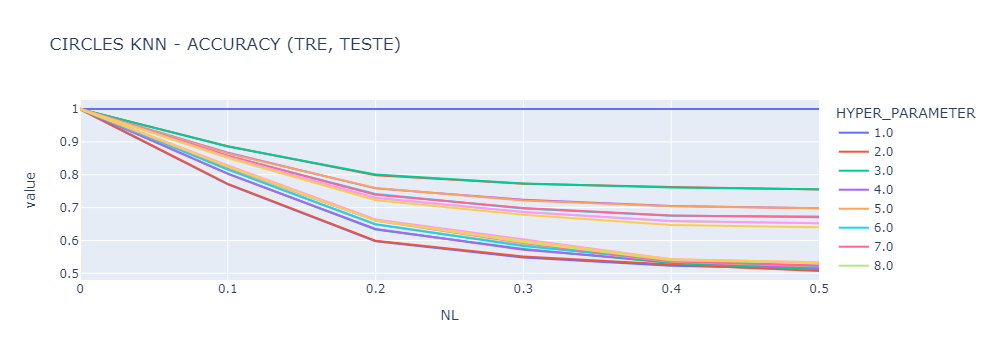

In [97]:
px.line(results.query('DS_NAME=="circles" and CLF_NAME=="knn" and N==10000')
        , x='NL', y=['TESTE','TRE'] 
        ,color = 'HYPER_PARAMETER'
        ,title='CIRCLES KNN - ACCURACY (TRE, TESTE)')

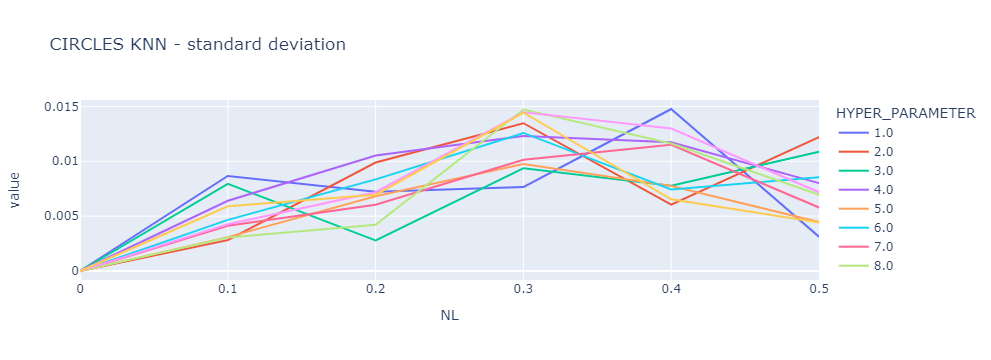

In [98]:
px.line(results.query('DS_NAME=="circles" and CLF_NAME=="knn" and N==10000')
        , x='NL'
        , y=['TESTE_std'] 
        ,color = 'HYPER_PARAMETER'
        ,title='CIRCLES KNN - standard deviation')

### MOONS DATASET

The best model HP for the KNN model are as follows:

K=1 shows great results due to overfit and will not be considered.

the knn model with HP of k=8 provides good accuracy score for TEST set with minimal TEST_std and low E_DIFF.
The model is quiet stable at all noise levels.

The knn model with HP of k=8 achieves accuracy of [1, 0.9988, 0.9693, 0.9061, 0.8475, 0.8026] for level noise values of [0, 0.1, 0.2, 0.3, 0.4, 0.5] respectively.

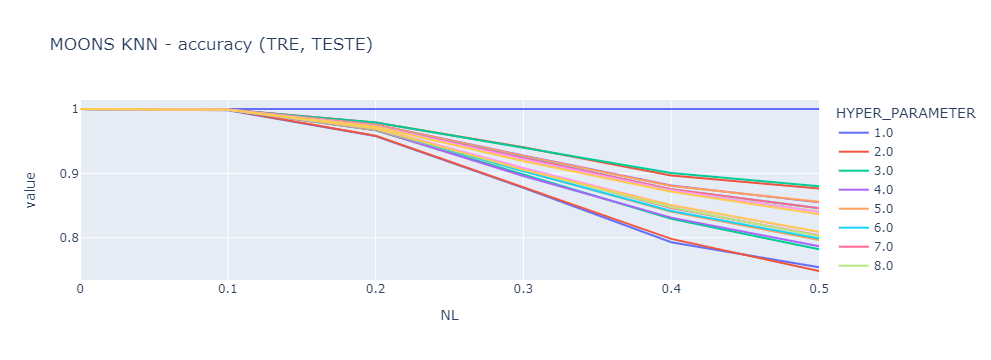

In [99]:
px.line(results.query('DS_NAME=="moons" and CLF_NAME=="knn" and N==10000')
        , x='NL'
        , y=['TESTE','TRE'] 
        ,color = 'HYPER_PARAMETER'
        ,title='MOONS KNN - accuracy (TRE, TESTE)')

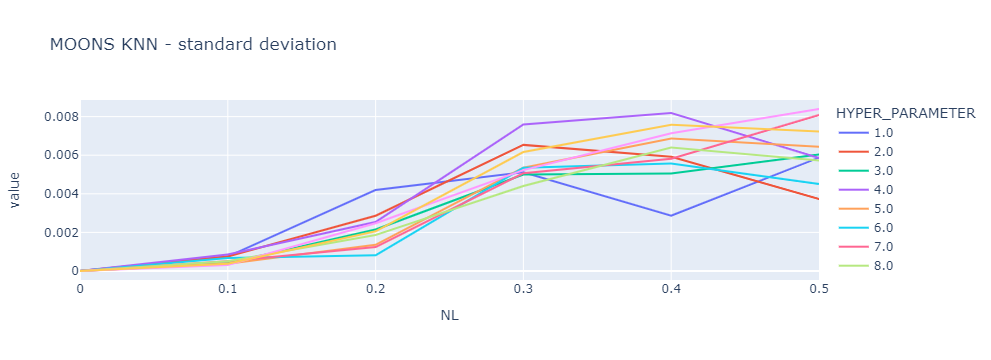

In [100]:
px.line(results.query('DS_NAME=="moons" and CLF_NAME=="knn" and N==10000')
        , x='NL'
        , y=['TESTE_std'] 
        ,color = 'HYPER_PARAMETER'
        ,title='MOONS KNN - standard deviation')

### 2. For KNN only, for dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.

### KNN

The circles dataset's model is less biased with higher variance then moons knn model (shown in two KNN graphs bellow). 
accuracy in circles - ranges from 0.5 to 0.6 (for all noise levels and HP)
accuracy in moons - ranges from 0.75 to 1.0 (for all noise levels and HP)
The circles model is more stable and all hyperparams range is tighter then in moons model.

### logistic regression

The circles dataset's model is less biased with higher variance then moons' model (shown in two Log_Reg graphs bellow). 
accuracy in circles - ranges from 0.485 to 0.5 (for all noise levels and HP)
accuracy in moons - ranges from 0.8 to 0.9 (for all noise levels and HP)
both models are not stale as of HP perspective.

The best model is The Log-Reg moons with gamma=1000 , with accuracy score 0.79-0.82 for all noise levels.
Leg_Reg model on circles is not a good model becase it's predictions are true on 50% of the cases.
KNN circles predicts a bit better.
KNN moons predicts with high variance.

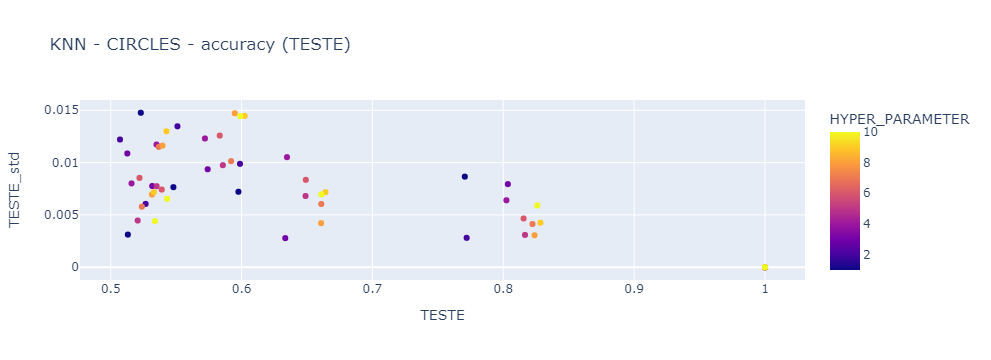

In [141]:
px.scatter(results.query('DS_NAME=="circles" and CLF_NAME=="knn" and N==10000')
        , x='TESTE'
        , y='TESTE_std'
        ,color = 'HYPER_PARAMETER'
        ,title='KNN - CIRCLES - accuracy (TESTE)')

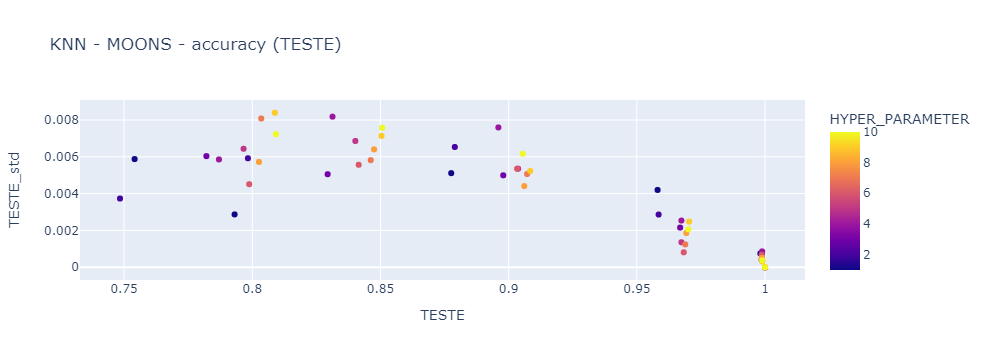

In [142]:
px.scatter(results.query('DS_NAME=="moons" and CLF_NAME=="knn" and N==10000')
        , x='TESTE'
        , y='TESTE_std' 
        ,color = 'HYPER_PARAMETER'
        ,title='KNN - MOONS - accuracy (TESTE)')

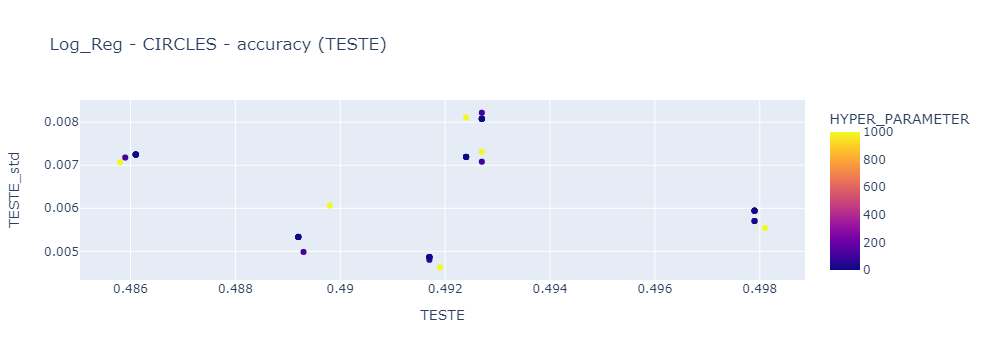

In [256]:
px.scatter(results.query('DS_NAME=="circles" and CLF_NAME=="log_reg" and N==10000')
        , x='TESTE'
        , y='TESTE_std' 
        ,color = 'HYPER_PARAMETER'
        ,title='Log_Reg - CIRCLES - accuracy (TESTE)')

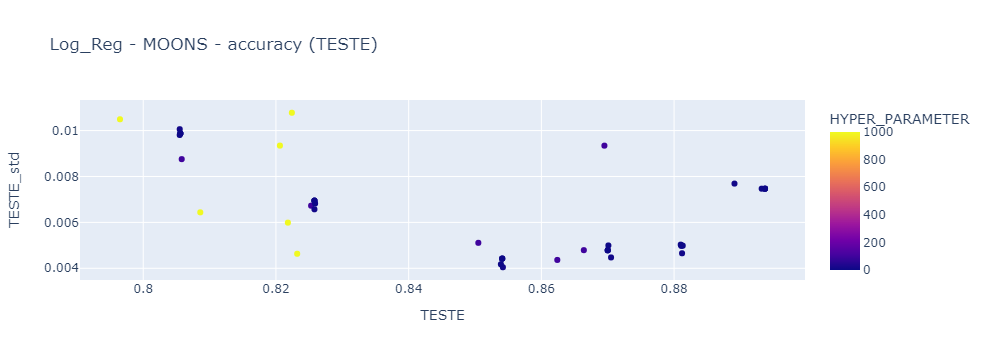

In [139]:
px.scatter(results.query('DS_NAME=="moons" and CLF_NAME=="log_reg" and N==10000')
        , x='TESTE'
        , y='TESTE_std' 
        ,color = 'HYPER_PARAMETER'
        ,title='Log_Reg - MOONS - accuracy (TESTE)')

### 3. Does regularization help for linear models? 

Yes, it does.
By "punishing" the model we can control the issue of overfitting. We reduce the model's sensitivity to noise, thus constructing a more robust model that provides better predictions on test data.
This technique reduces the coefficients of features that tend follow the noise.
We can see it very clearly in the log_Reg moons model, where HP=1000 the accuracy of the model is a lower than HP<=1 but is more consistant and the variance is low.

### 4. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? 

In logistic regression as data size increase difference error declines and accuracy score for test and train converge.
In KNN model difference error changes slightly as datasets grow.

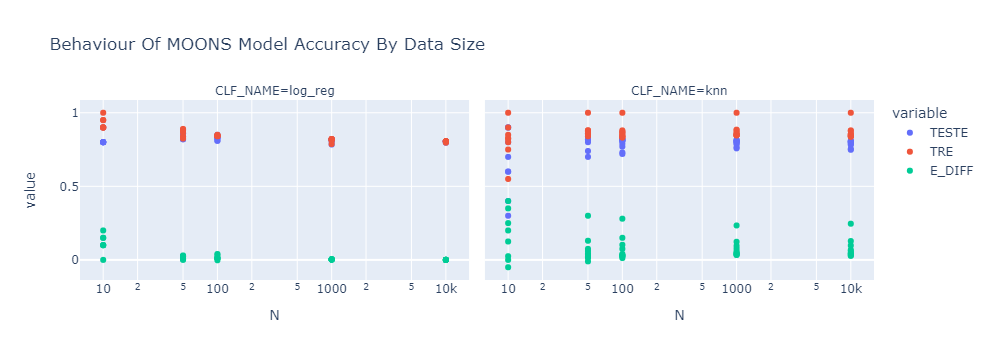

In [267]:
px.scatter(results.query('DS_NAME=="moons" and NL==0.5')
        , x = 'N'
        , log_x=True
        , y=['TESTE','TRE','E_DIFF']
        , facet_col = 'CLF_NAME'
        , title='Behaviour Of MOONS Model Accuracy By Data Size')

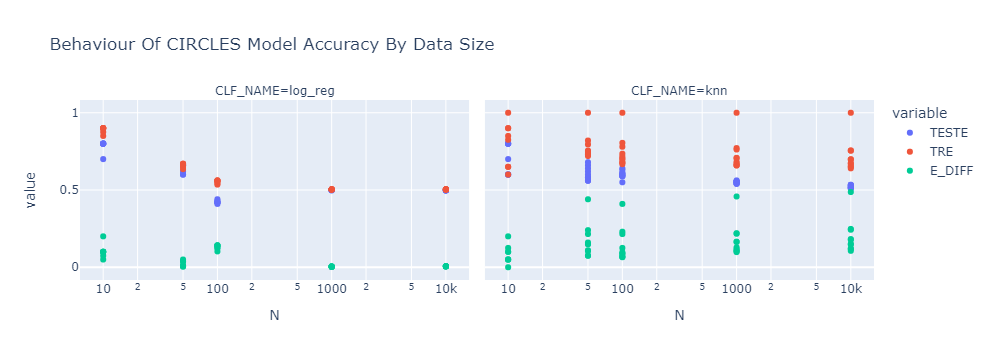

In [266]:
px.scatter(results.query('DS_NAME=="circles" and NL==0.5')
        , x = 'N'
        , log_x=True
        , y=['TESTE','TRE','E_DIFF']
        , facet_col = 'CLF_NAME'
        , title='Behaviour Of CIRCLES Model Accuracy By Data Size')

### 5. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? 

As complexity grows difference error decreases.
In small datasets like 10 or 50 (in the example below) we can see that in a certain level of complexity the error difference reaches its minimum and as complexity rises difference error increases again due to over complexity.
in large datasets we did not reach the min. level of e_diff with the hyper parameters provided.

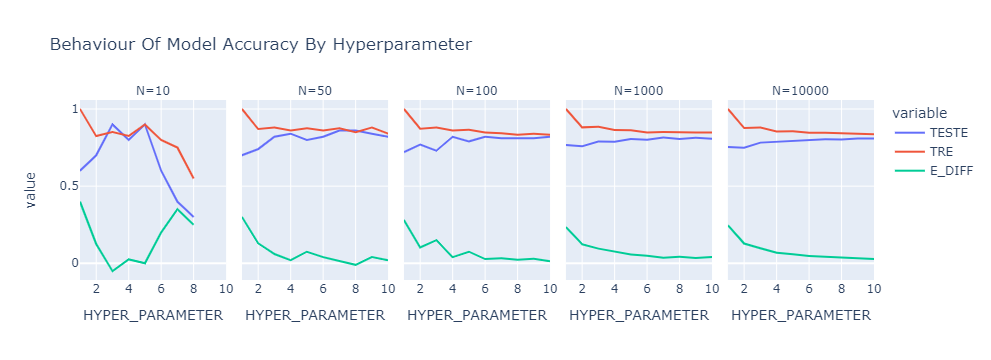

In [245]:
px.line(results.query('DS_NAME=="moons" and CLF_NAME=="knn" and NL==0.5')
        , x = 'HYPER_PARAMETER'
        , y=['TESTE','TRE','E_DIFF']
        , facet_col = 'N'
        , title='Behaviour Of Model Accuracy By Hyperparameter')

### 6. Are the noise level effect the number of datapoints needed to reach minimal test results? 


Yes. In small datasets the model does not distinguish well between pattern and noise, hence the difference error is high over all noise levels, we can see that in the 10 obs. datasets. 
In the Knn model larger datasets, difference error rises as noise level increase.
In the log_reg model (below) difference error dicreases as noise level increase and with respect to increase in dataset size.
The answer is based on moons dataset alone, because both models fail to predict the pattern in the circles dataset.

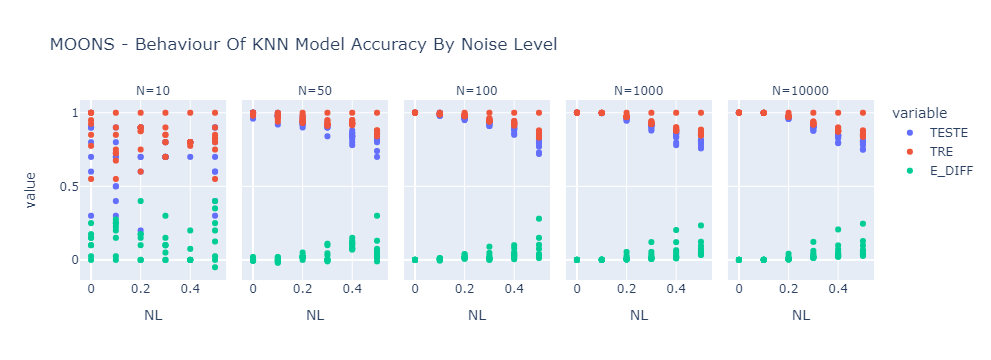

In [270]:
px.scatter(results.query('DS_NAME=="moons" and CLF_NAME=="knn"')
        , x = 'NL'
        , y=['TESTE','TRE','E_DIFF']
        , title='MOONS - Behaviour Of KNN Model Accuracy By Noise Level'
        , facet_col = 'N'
        )

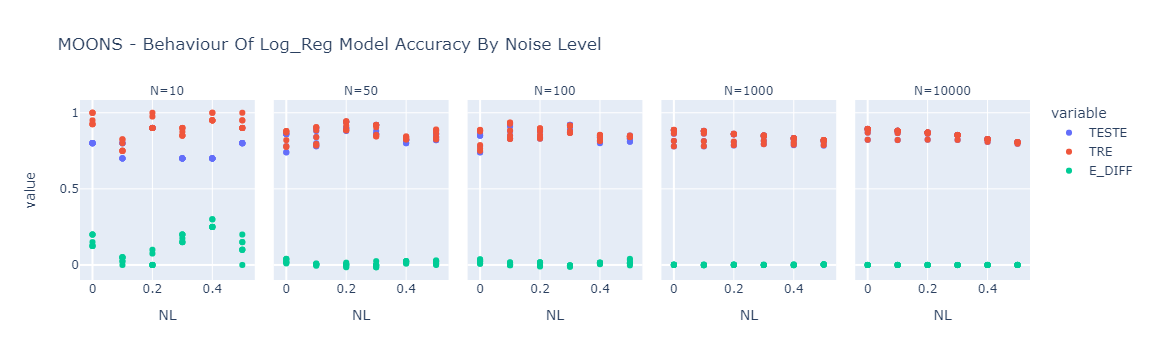

In [275]:
px.scatter(results.query('DS_NAME=="moons" and CLF_NAME=="log_reg"')
        , x = 'NL'
        , y=['TESTE','TRE','E_DIFF']
        , title='MOONS - Behaviour Of Log_Reg Model Accuracy By Noise Level'
        , facet_col = 'N'
        )

### 7. Select the best model param to fit the data (The one minimizing the test error) and for it, observe the number of data points needed for optimal test results in different noise levels.

Dataset of 1000 obs. is sufficient enough for the two models.
Both models fail to predict the circles dataset (accuracy of 0.5-0.6)
the moons dataset is well predicted by the logistic regression with accuracy of 0.8-0.82 and low variance with gamma=1000 (C=0.001).
the KNN model accuracy score ranges between 0.8 to 0.99 with minimal difference error with k-neighbours = 8.
